# 基于协方差矩阵的特征值分解算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def loaddata():
    data = np.loadtxt('data/pca_data.csv',delimiter=',')
    return data

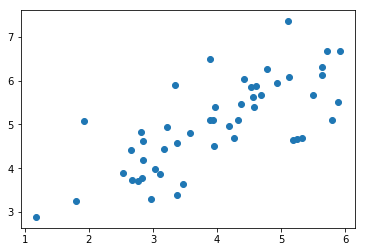

In [13]:
X = loaddata()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [15]:
X

array([[3.38156267, 3.38911269],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129844, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929],
       [4.57407171, 5.39765069],
       [4.37173356, 5.46116549],
       [4.19169388, 4.95469359],
       [5.24408518, 4.66148767],
       [2.8358402 , 3.76801716],
       [5.63526969, 6.31211438],
       [4.68632968, 5.6652411 ],
       [2.85051337, 4.62645627],
       [5.1101573 , 7.36319662],
       [5.18256377, 4.64650909],
       [5.70732809, 6.68103995],
       [3.57968458, 4.80278073],
       [5.63937773, 6.12043594],
       [4.26346851, 4.68942897],
       [2.53651693, 3.88449078],
       [3.22382902, 4.94255585],
       [4.92948801, 5.95501971],
       [5.79295774, 5.10839305],
       [2.81684824, 4.81895769],
       [3.88882414, 5.10036564],
       [3.

### 特征归一化

In [16]:
def featureNormalize(X):
    mu = np.mean(X,axis=0).reshape(1,-1)
    sigma = np.std(X,axis=0,ddof=1).reshape(1,-1)
    X = (X-mu)/sigma
    return X,mu,sigma

### PCA实现
<img src="images/01.png" width="500" align="left" />

In [17]:
def pca(X,K):
    m = len(X)
    sigma = np.dot(X.T,X)/(m-1)

    #返回的特征向量要是排序后的
    eigenvalues,eigenvectors = np.linalg.eig(sigma)

    index = np.argsort(-eigenvalues)  # 依照特征值进行从大到小排序
    eigenvectors = eigenvectors[:,index] #特征向量对应到特征值的顺序

    u_reduce = eigenvectors[:,0:K]
    return np.dot(X,u_reduce),eigenvectors

In [18]:
X,mu,sigma = featureNormalize(X)
Z,eigenvectors = pca(X,1)
print(Z)

[[ 1.48127391]
 [-0.91291229]
 [ 1.21208656]
 [ 1.62734009]
 [ 1.26042409]
 [-0.96700223]
 [ 1.25605967]
 [-2.31794969]
 [-0.02968998]
 [-0.77386123]
 [-0.62532902]
 [-0.54724542]
 [-0.08878025]
 [-0.520569  ]
 [ 1.548434  ]
 [-1.89684585]
 [-0.87788459]
 [ 0.94646472]
 [-2.30653955]
 [-0.4731351 ]
 [-2.19518524]
 [ 0.38509662]
 [-1.76688508]
 [ 0.0512347 ]
 [ 1.64838858]
 [ 0.50302869]
 [-1.2246766 ]
 [-1.16020771]
 [ 0.83375215]
 [-0.00686207]
 [-0.22565101]
 [-1.49788781]
 [ 1.3252858 ]
 [-0.58656923]
 [ 0.67225099]
 [-1.33938187]
 [ 1.67053477]
 [-1.37836539]
 [ 2.53419743]
 [-0.27570789]
 [-0.96695982]
 [ 0.8792732 ]
 [ 1.28362916]
 [-0.97972108]
 [ 1.79450473]
 [-0.26923019]
 [ 3.16088618]
 [ 1.20080033]
 [ 0.36423084]
 [-1.42814204]]


In [19]:
def recoverData(Z, U, K):
    U_reduce = U[:,0:K]
    X_rec = np.dot(Z,np.transpose(U_reduce))
    return X_rec

In [20]:
def plotData(X_orgin,X_rec):
    plt.scatter(X_orgin[:,0],X_orgin[:,1])
    plt.scatter(X_rec[:, 0], X_rec[:, 1],c='red')
    plt.show()

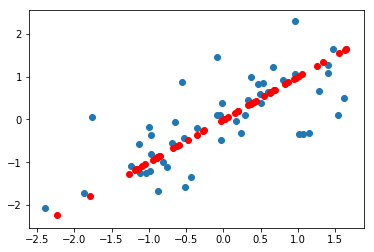

In [21]:
X_rec = recoverData(Z,eigenvectors,1)
plotData(X,X_rec)